# 01_EDA & FEATURE ENGINEERING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

## 1. LOAD DATA

In [2]:
df = pd.read_csv("../backend/dataset/shopping_trends.csv")

print("Initial Shape:", df.shape)
print("\nColumns:")
print(df.columns)
print("\nPreview:")
print(df.head())

Initial Shape: (3900, 19)

Columns:
Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

Preview:
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L    

## 2. DATA CLEANING

In [3]:
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

print("\nMissing Values:")
print(df.isnull().sum())

df = df.dropna()

Shape after removing duplicates: (3900, 19)

Missing Values:
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


## 3. BASIC EDA VISUALS

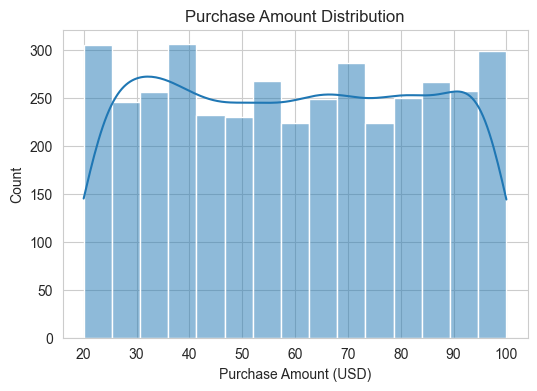

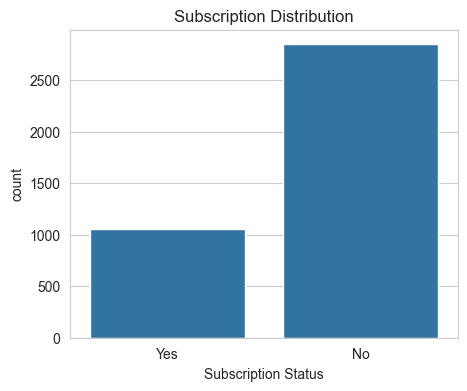

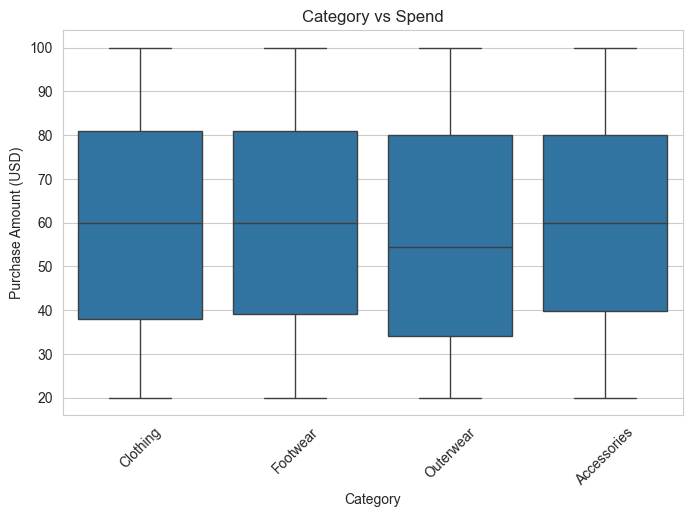

In [4]:
plt.figure(figsize=(6,4))
sns.histplot(df['Purchase Amount (USD)'], kde=True)
plt.title("Purchase Amount Distribution")
plt.show()

plt.figure(figsize=(5,4))
sns.countplot(x='Subscription Status', data=df)
plt.title("Subscription Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='Category', y='Purchase Amount (USD)', data=df)
plt.xticks(rotation=45)
plt.title("Category vs Spend")
plt.show()

## 4. FEATURE ENGINEERING

In [5]:
threshold = df['Purchase Amount (USD)'].quantile(0.75)
df['High_Value'] = (df['Purchase Amount (USD)'] > threshold).astype(int)

print("\nHigh Value Distribution:")
print(df['High_Value'].value_counts(normalize=True))


High Value Distribution:
High_Value
0    0.762564
1    0.237436
Name: proportion, dtype: float64


In [6]:
df['Sentiment'] = pd.cut(
    df['Review Rating'],
    bins=[0, 2.5, 3.4, 4.2, 5.0],
    labels=["Negative","Average", "Good", "Excellent"],
    include_lowest=True
)

print("\nSentiment Distribution:")
print(df['Sentiment'].value_counts())


Sentiment Distribution:
Sentiment
Average      1424
Good         1266
Excellent    1144
Negative       66
Name: count, dtype: int64


In [7]:
df['Discount_Flag'] = df['Discount Applied'].map({'Yes':1, 'No':0})

if 'Customer ID' in df.columns:
    discount_ratio = df.groupby('Customer ID')['Discount_Flag'].mean()
    df = df.merge(discount_ratio.rename('Discount_Sensitivity'),
                  on='Customer ID')
else:
    df['Discount_Sensitivity'] = df['Discount_Flag']

In [8]:
df['F_score'] = pd.qcut(df['Previous Purchases'], 5, labels=[1,2,3,4,5])

df['M_score'] = pd.qcut(df['Purchase Amount (USD)'], 5, labels=[1,2,3,4,5])
df['Frequency of Purchases'] = df['Frequency of Purchases'].str.strip()

df['Frequency of Purchases'] = df['Frequency of Purchases'].replace({
    'Every 3 Months': 'Quarterly'
})

freq_map = {
    'Weekly':5,
    'Bi-Weekly':4,
    'Fortnightly':4,
    'Monthly':3,
    'Quarterly':2,
    'Annually':1
}

df['R_score'] = df['Frequency of Purchases'].map(freq_map)

df['F_score'] = df['F_score'].astype(int)
df['M_score'] = df['M_score'].astype(int)

df['RFM_Score'] = df['R_score'] + df['F_score'] + df['M_score']

In [9]:
def loyalty_tier(x):
    if x >= 11:
        return "Gold"
    elif x >= 7:
        return "Silver"
    else:
        return "Bronze"

df['Loyalty_Tier'] = df['RFM_Score'].apply(loyalty_tier)

print("\nLoyalty Tier Distribution:")
print(df['Loyalty_Tier'].value_counts())


Loyalty Tier Distribution:
Loyalty_Tier
Silver    2244
Gold      1052
Bronze     604
Name: count, dtype: int64


## 5. FINAL CHECK

In [10]:
print("\nFinal Shape:", df.shape)
print("\nFinal Columns:")
print(df.columns)

print("\nFinal Missing Values:")
print(df.isnull().sum())


Final Shape: (3900, 28)

Final Columns:
Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'High_Value', 'Sentiment', 'Discount_Flag',
       'Discount_Sensitivity', 'F_score', 'M_score', 'R_score', 'RFM_Score',
       'Loyalty_Tier'],
      dtype='object')

Final Missing Values:
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type        

In [11]:
df.to_csv("cleaned_data.csv", index=False)
print("Saved as cleaned_data.csv in current directory")

Saved as cleaned_data.csv in current directory
